# 1.Install and Import Dependencies

In [1]:
!pip install torch torchvision torchaudio

In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [4]:
!pip install --upgrade matplotlib numpy

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/99/2b/f7114983d84303019385d93d24d729aedba67be7e083286f114188943cf3/numpy-1.26.3-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.26.3-cp311-cp311-win_amd64.whl.metadata (61 kB)
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB 435.7 kB/s eta 0:00:18
   ---------------------------------------- 0.1/7.6 MB 656.4 kB/s eta 0:00:12
    --------------------------------------- 0.1/7.6 MB 944.1 kB/s eta 0:00:08
    --------------------------------------- 0.2/7.6 MB 984.6 k

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.3 which is incompatible.



   -- ------------------------------------- 1.1/15.8 MB 478.6 kB/s eta 0:00:31
   -- ------------------------------------- 1.1/15.8 MB 478.6 kB/s eta 0:00:31
   --- ------------------------------------ 1.3/15.8 MB 469.8 kB/s eta 0:00:31
   --- ------------------------------------ 1.3/15.8 MB 469.8 kB/s eta 0:00:31
   --- ------------------------------------ 1.3/15.8 MB 470.3 kB/s eta 0:00:31
   --- ------------------------------------ 1.3/15.8 MB 466.1 kB/s eta 0:00:32
   --- ------------------------------------ 1.4/15.8 MB 472.8 kB/s eta 0:00:31
   --- ------------------------------------ 1.4/15.8 MB 466.3 kB/s eta 0:00:31
   --- ------------------------------------ 1.4/15.8 MB 466.3 kB/s eta 0:00:31
   --- ------------------------------------ 1.4/15.8 MB 469.2 kB/s eta 0:00:31
   --- ------------------------------------ 1.4/15.8 MB 473.0 kB/s eta 0:00:31
   --- ------------------------------------ 1.4/15.8 MB 473.0 kB/s eta 0:00:31
   --- ------------------------------------ 1.4/15.

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2.Load Model

In [6]:
model = torch.hub.load('ultralytics/yolov5','yolov5s') #loading pretrained ultralytics model from torchhub

Using cache found in C:\Users\madha/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-1-20 Python-3.11.5 torch-2.1.2+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3.Make Detections using images


In [9]:
img = "https://c.pxhere.com/photos/10/ab/highway_travel_ride_reindeer_autos_traffic_vehicles_motor_vehicles_multi_track-1393510.jpg!d"

In [10]:
results = model(img)
results.print()

image 1/1: 1214x1200 22 cars, 1 truck
Speed: 1073.3ms pre-process, 198.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


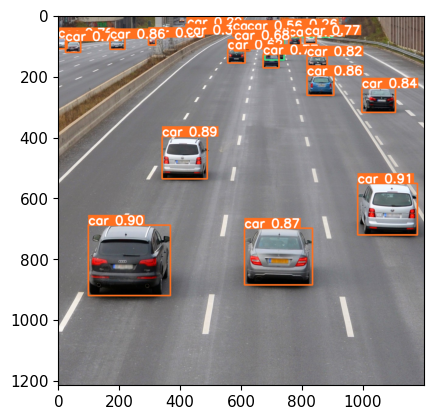

In [11]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# 4.Real Time Detections

In [12]:
# Access webcam through OpenCV
cap = cv2.VideoCapture(0)  # Access the default webcam (change the index if needed). To make detection on video put the name_of_video.mp4 on cv2.VideoCapture(0) fn instead of 0
while cap.isOpened():
    #Read feed
    ret, frame = cap.read()
    
    #Make detection
    results = model(frame) #pass the yolo model to the frame
    
    # Show the frame
    cv2.imshow('Drowsiness Detection', np.squeeze(results.render()))
    #results.render() menthod returns only the image array, so using squeeze fn to extract the values from big array

    # Check for 'q' key press to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()

# 5.Train from Scratch

In [2]:
import uuid #unique identifier-used to name the collecting images
import os
import time

In [14]:
IMAGES_PATH = os.path.join('data','images') #save the image data(data/images)
labels = ['awake', 'drowsy']
number_imgs = 20

## The following code must be complied ONLY when dataset needs to be retrained


In [20]:
'''
cap = cv2.VideoCapture(0)
#Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    #Loop through image range
    for img_num in range(number_imgs): #collect 20 images
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        #Webcam feed
        ret, frame = cap.read()
        
        #Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg') #full datapath to image & the name of the class with a unique identifier so they don't overlap
        
        #Writes out image to file
        cv2.imwrite(imgname, frame)
        
        #Render to the screen
        cv2.imshow('Image Collection', frame)
        
        #2 seconds delay b/w captures
        time.sleep(2)
        
        # Check for 'q' key press to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()
'''

In [21]:
'''print(os.path.join(IMAGES_PATH,labels[0]+'.'+str(uuid.uuid1())+'.jpg'))'''

data\images\awake.b7069db7-bada-11ee-aa37-ec2e98e0aa40.jpg


In [22]:
#sample demo o/p for above code
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs): #collect 20 images
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg') 
        print(imgname)

data\images\awake.bb4786cc-bada-11ee-b474-ec2e98e0aa40.jpg
data\images\awake.bb4786cd-bada-11ee-a330-ec2e98e0aa40.jpg
data\images\awake.bb4786ce-bada-11ee-a7f8-ec2e98e0aa40.jpg
data\images\awake.bb4786cf-bada-11ee-898d-ec2e98e0aa40.jpg
data\images\awake.bb4786d0-bada-11ee-80f4-ec2e98e0aa40.jpg
data\images\awake.bb4786d1-bada-11ee-8662-ec2e98e0aa40.jpg
data\images\awake.bb4786d2-bada-11ee-a749-ec2e98e0aa40.jpg
data\images\awake.bb4786d3-bada-11ee-873a-ec2e98e0aa40.jpg
data\images\awake.bb4786d4-bada-11ee-9bfc-ec2e98e0aa40.jpg
data\images\awake.bb4786d5-bada-11ee-a4e7-ec2e98e0aa40.jpg
data\images\awake.bb4786d6-bada-11ee-a72e-ec2e98e0aa40.jpg
data\images\awake.bb4786d7-bada-11ee-88ed-ec2e98e0aa40.jpg
data\images\awake.bb4786d8-bada-11ee-b932-ec2e98e0aa40.jpg
data\images\awake.bb4786d9-bada-11ee-ad00-ec2e98e0aa40.jpg
data\images\awake.bb4786da-bada-11ee-9376-ec2e98e0aa40.jpg
data\images\awake.bb4786db-bada-11ee-99d7-ec2e98e0aa40.jpg
data\images\awake.bb4786dc-bada-11ee-b28f-ec2e98e0aa40.j

In [23]:
!git clone --depth 1 https://github.com/HumanSignal/labelImg


fatal: destination path 'labelImg' already exists and is not an empty directory.


In [19]:
!pip install pyqt5 lxml --upgrade
#standard installation code for label image
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc 
#working with the above git cloned resources.qrc file
#seeding into that label image file 

In [25]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-278-g050c72c Python-3.11.5 torch-2.1.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, 

# 6.Load Custom Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = r"C:\Users\madha\Desktop\DrowsinessDetector\yolov5\runs\train\exp\weights\last.pt", force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\madha/.cache\torch\hub\master.zip
YOLOv5  2024-1-25 Python-3.11.5 torch-2.1.2+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [4]:
img = os.path.join('data', 'images', 'drowsy.7b8cf785-bada-11ee-a107-ec2e98e0aa40.jpg')

In [5]:
results = model(img)

In [6]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 23.1ms pre-process, 156.3ms inference, 22.3ms NMS per image at shape (1, 3, 480, 640)


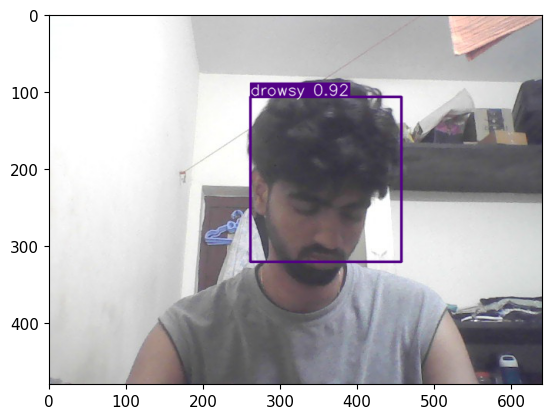

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## TO CHECK REAL TIME FOOTAGE 


In [8]:
# Access webcam through OpenCV
cap = cv2.VideoCapture(0)  # Access the default webcam (change the index if needed). To make detection on video put the name_of_video.mp4 on cv2.VideoCapture(0) fn instead of 0
while cap.isOpened():
    #Read feed
    ret, frame = cap.read()
    
    #Make detection
    results = model(frame) #pass the yolo model to the frame
    
    # Show the frame
    cv2.imshow('Drowsiness Detection', np.squeeze(results.render()))
    #results.render() menthod returns only the image array, so using squeeze fn to extract the values from big array

    # Check for 'q' key press to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()